# What is a classification problem?

* Binary Classification - one thing or another - "Is this email spam or not spam?"
* Multi-Class Classification - more than one thing or another - "Is this a photo of steak, sushi or pizza?"
* Multi-Label Classification - multiple label options per sample - "Comparing what tags an article on Wikipedia has - for example an article could have 4 different tags for 1 sample article"

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


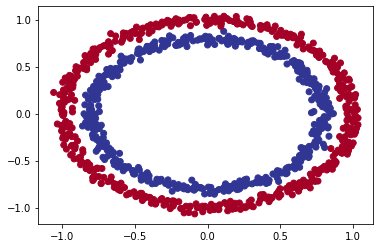

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes


In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
len(X), len(y)

(1000, 1000)

In [9]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modeling

In [10]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])

model.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5157


In [11]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),\
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

model2.fit(X, y, epochs=100, verbose=0)

model2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

To visualize our model's predictions, let's create a function `plot_decision_boundary()` - this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between the different zones where each unique class falls

In [12]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = tf.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)

  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


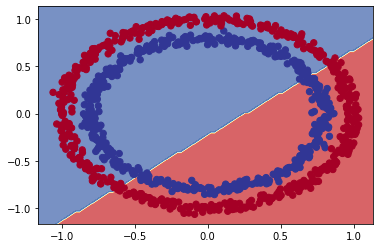

In [13]:
# Check out the predictions our model is making
plot_decision_boundary(model2, X, y)

In [14]:
# Lets see if the model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100 - this is the relationship we want the model to find

# Split the data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model to the regression data
# model2.fit(X_reg_train, y_reg_train, epochs=100)

Oh wait... we compiled the model for a binary classification problem. But we're now working on a regression problem, let's change the model to suit the data.

In [15]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

model3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 269.0470 - mae: 269.0470
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 154.3811 - mae: 154.3811
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 57.2730 - mae: 57.2730
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 72.9343 - mae: 72.9343
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 74.6513 - mae: 74.6513
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 51.1576 - mae: 51.1576
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 46.7825 - mae: 46.7825
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 45.3201 - mae: 45.3201
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.2766 - mae: 43.2766
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.0545 - mae: 42.0545
Epoch 11/100
5/5 [==============================] - 0s 

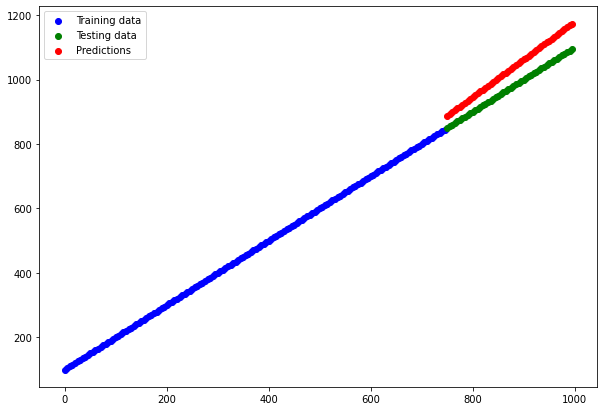

In [16]:
# Make predictions with our trained model
y_reg_preds = model3.predict(X_reg_test)

# Plot the models predictions against the regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

# The missing piece: Non-linearity

In [17]:
# Set the random seed
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="linear")
])

# compile
model4.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

history = model4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7724 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9616 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6369 - accuracy: 0.4227
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9298 - accuracy: 0.3950
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5803 - accuracy: 0.4409
Epoch 11/

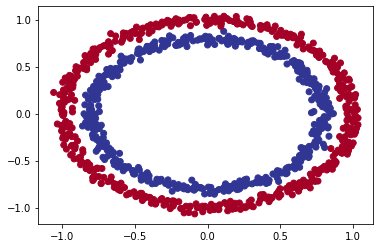

In [18]:
# Check the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

doing binary classification


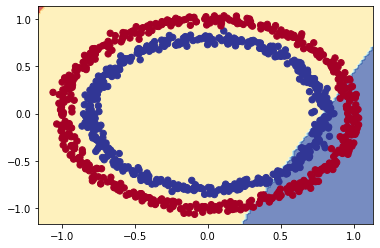

In [19]:
# Check the decision boundary for the latest model
plot_decision_boundary(model4, X, y)

In [20]:
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="relu")
])

model5.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

history = model5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7724 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9616 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6369 - accuracy: 0.4227
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9298 - accuracy: 0.3950
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5803 - accuracy: 0.4409
Epoch 11/

In [21]:
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1)
])

model6.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

history = model6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 7.9753 - accuracy: 0.4830
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.8983 - accuracy: 0.4880
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 7.8184 - accuracy: 0.4931
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7682 - accuracy: 0.4964
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.9795 - accuracy: 0.4827
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.2219 - accuracy: 0.5318
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 7.6230 - accuracy: 0.5058
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7149 - accuracy: 0.4998
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 8.0269 - accuracy: 0.4796
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.4648 - accuracy: 0.5161
Epoch 11/

In [22]:
# Evalute the model
model6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


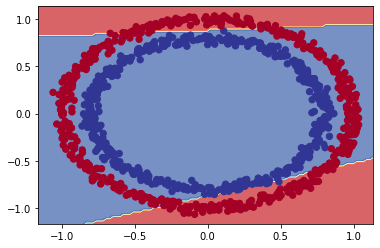

In [23]:
# How do our model predictions look?
plot_decision_boundary(model6, X, y)

In [24]:
tf.random.set_seed(42)

model7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model7.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

model7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.4875
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5110
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5470
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5004
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5259
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5237
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5427
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5396
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5360
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5418
Epoch 11/

In [25]:
model7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9920


[0.04593365266919136, 0.9919999837875366]

doing binary classification


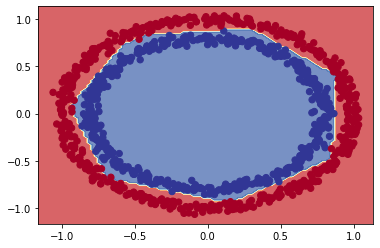

In [26]:
plot_decision_boundary(model7, X, y)

In [27]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

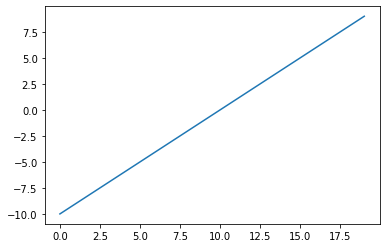

In [28]:
# Visualize our toy tensor
plt.plot(A)

In [29]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [30]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

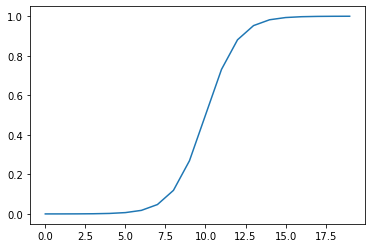

In [31]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [32]:
# let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [33]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

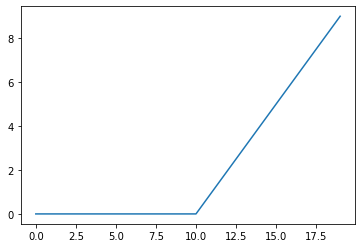

In [34]:
plt.plot(relu(A))

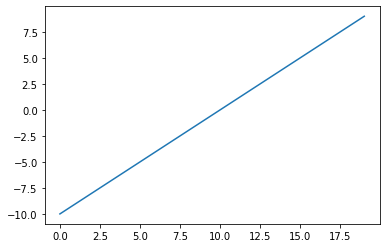

In [35]:
plt.plot(A)

In [36]:
# Lets try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [37]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

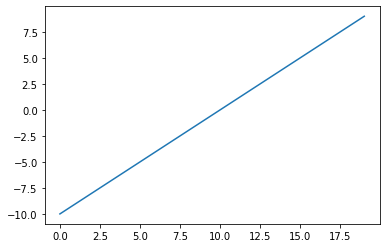

In [38]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [39]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluating and improving our classification

So far we've been training and testing on the same dataset...
However, this is a mortal sin in machine learning.

We need different sets

In [40]:
# Check how many samples we have
len(X)

1000

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((800, 2), (200, 2), (800,), (200,))

In [43]:
# Lets recreate a model to fit on the training data and evaluate on the testing data
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 1. Compile the model
model_8.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=["accuracy"])

In [44]:
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 1ms/step - loss: 0.6863 - accuracy: 0.5212
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5516
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.5601
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6651 - accuracy: 0.5903
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.5585
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.6057
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.5698
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.6192
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6403 - accuracy: 0.5937
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.6209
Epoch 11/25
25/25 [

In [45]:
# 4. Evalute the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 1.0000


[0.07235660403966904, 1.0]

doing binary classification
doing binary classification


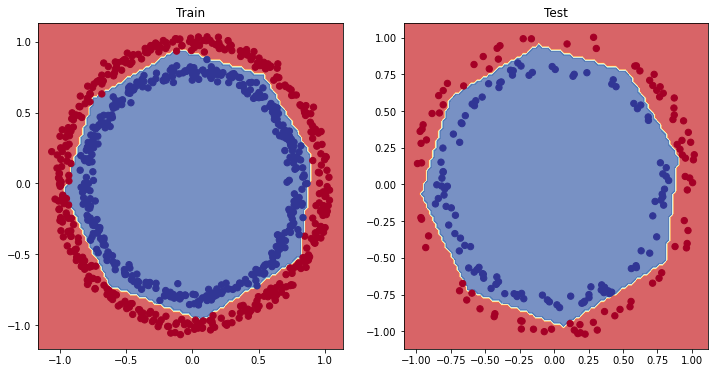

In [46]:
# Plot the decision boundary for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)

# Plot the loss (or training) curves

In [47]:
# Convert the history objecti nto a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.682498,0.52625
1,0.674952,0.55000
2,0.670248,0.55625
3,0.664275,0.57875
4,0.657914,0.55875
5,0.654852,0.60500
6,0.650293,0.58250
7,0.642773,0.59500
8,0.630871,0.61125
9,0.611740,0.67125


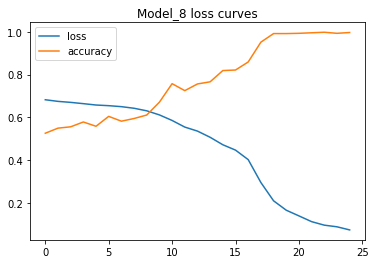

In [48]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

**For many problems, the loss function going down means the model is improving (the preground truth labels)**

# Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* it's training
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot

In [49]:
# Set random seed
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  # Ouput layer
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

# Call back runs during model training, so it needs to be set up before training
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[learning_rate_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5006
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6843 - accuracy: 0.5210
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5284
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4861
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5134
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5047
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5178
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.4990
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4780
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5331
Epoch 11/

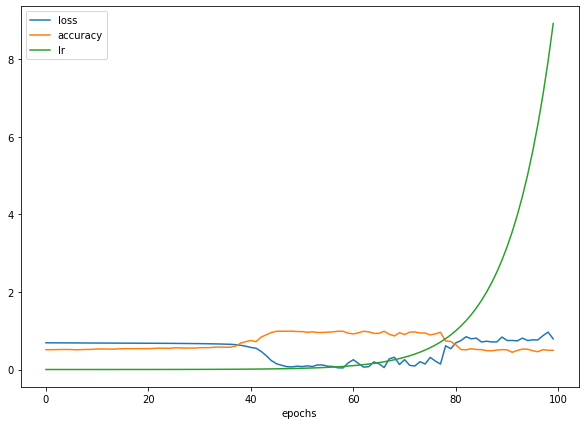

In [50]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

In [51]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [52]:
len(lrs)

100

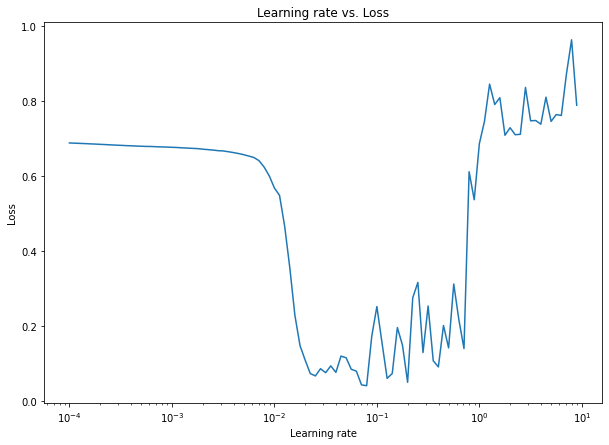

In [53]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [54]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [55]:
# Let's try using a higher *ideal* learning rate with the same model

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.02), metrics=["accuracy"])

history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.5480
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6666 - accuracy: 0.5876
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.5830
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6543 - accuracy: 0.6233
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.6035
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6137 - accuracy: 0.7123
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5435 - accuracy: 0.7901
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.8533
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.9228
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1930 - accuracy: 0.9878
Epoch 11/20
25/25 [

In [56]:
# Evaluate model 10 on the test data
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 1.0000


[0.028125787153840065, 1.0]

In [57]:
# Evaluate model 8 on the test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 1.0000


[0.07235660403966904, 1.0]

doing binary classification
doing binary classification


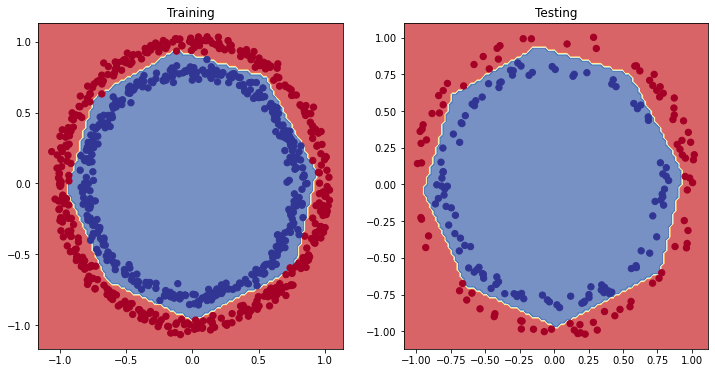

In [58]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_10, X_test, y_test)
plt.show();

# More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion matrix
* Classification report (from scikit-learn)

In [59]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 1.0000
Model loss on the test set: 0.028125787153840065
Model accuracy on the test set: 100.00%


In [60]:
from sklearn.metrics import confusion_matrix
# Create a confusion matrix

y_preds = model_10.predict(X_test)
# confusion_matrix(y_test, y_preds)

In [61]:
y_test[:10]

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [62]:
y_preds[:10]

array([[1.60932541e-04],
       [9.97236609e-01],
       [1.23209655e-01],
       [9.51600313e-01],
       [5.51521778e-04],
       [9.99207973e-01],
       [9.84001756e-01],
       [9.98718619e-01],
       [2.19464302e-04],
       [9.94682252e-01]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions

In [63]:
confusion_matrix(y_test, tf.round(y_preds))

array([[ 91,   0],
       [  0, 109]])

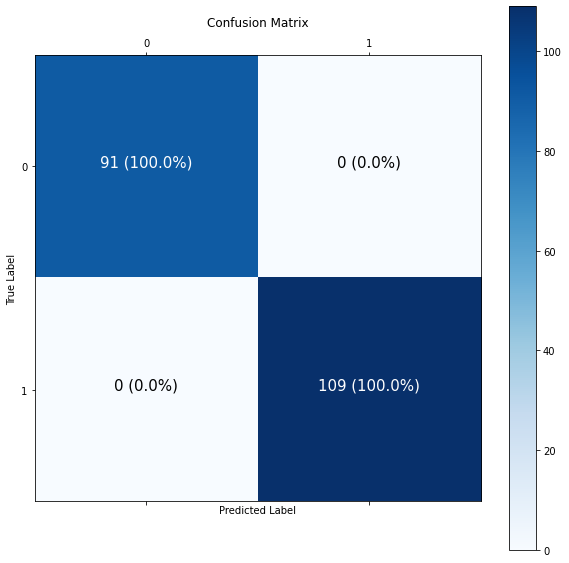

In [64]:
import itertools
figsize = (10, 10)

# Create confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalize
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

threshold = (cm.max() + cm.min()) / 2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", horizontalalignment="center", color="white" if cm[i, j] > threshold else "black", size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**
* This means if you have 3 different classes, it's multi-class
* It also means if you have 100 different classes, it's multi-class

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

Label key:
* 0 - T-shirt/top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker
* 8 - Bag
* 9 - Ankle Boot

In [65]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [66]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label sample:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [67]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

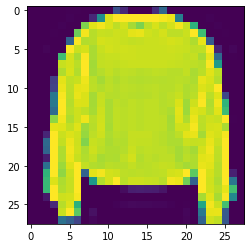

In [68]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [69]:
train_labels[7]

2

In [70]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
len(class_names)

10

Text(0.5, 1.0, 'Shirt')

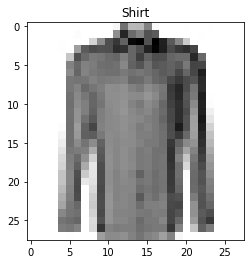

In [71]:
index_of_choice = 140
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

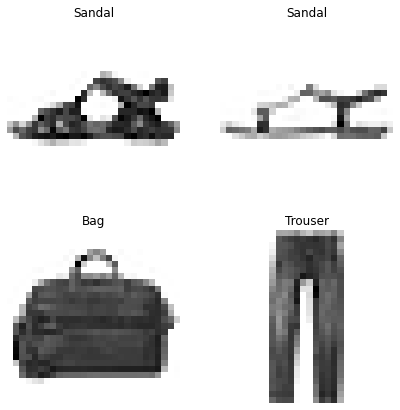

In [72]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifierrs, however, we're going to have to tweak a few things:
* Input shape = 28x28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = `tf.keras.losses.CategoricalCrossentropy()`
  * If your labels are one-hot encoded, use `CategoricalCrossentropy()`
  * If your labels are in integer format, use `SparseCategoricalEntropy()`
* Output layer activation = Softmax (not sigmoid)

**Note**: If you get shape errors during the modelling phase, check the input shape, output shape and loss function

In [73]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # our data needs to be flattened from 28x28 to None, 784
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8192 - accuracy: 0.1345 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7426 - accuracy: 0.2323 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6413 - accuracy: 0.2837 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6065 - accuracy: 0.2888 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5988 - accuracy: 0.3031 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5888 - accuracy: 0.3078 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5668 - accuracy: 0.3213 - val_loss: 1.5695 - val_accuracy:

In [74]:
# Check the model summary
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_26 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [75]:
train_data.min(), train_data.max()

(0, 255)

## Neural networks prefer data to be scaled (normalization) - this essentially means they like to have the numbers in the tensors to be between 0 & 1

In [76]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_normalized = train_data / 255.0
test_data_normalized = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_normalized.min(), train_data_normalized.max()

(0.0, 1.0)

In [77]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

norm_history = model_12.fit(train_data_normalized, train_labels, epochs=10, validation_data=(test_data_normalized, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

**Note**: Neural Networks tend to prefer data in numerical form as well as scaled/normalized(numbers between 0 & 1)

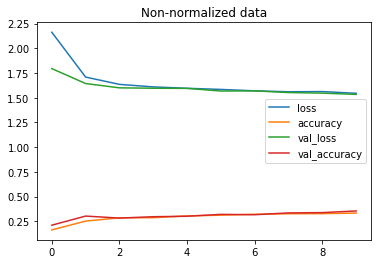

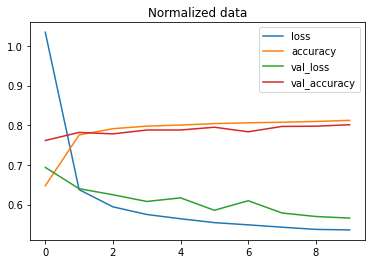

In [78]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note:** The same model with even **slightly** different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture)

# Finding the ideal learning rate

In [79]:
# set random_seed
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_normalized, train_labels, epochs=40, validation_data=(test_data_normalized, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

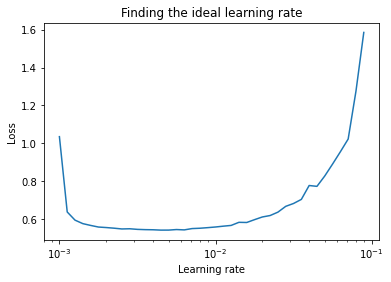

In [80]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [81]:
# Let's refit a model with the ideal learning rate
# Set random seed
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

history_14 = model_14.fit(train_data_normalized, train_labels, epochs=20, validation_data=(test_data_normalized, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

# Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [82]:
# Create a confusion matrix
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalize
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  
  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", horizontalalignment="center", color="white" if cm[i, j] > threshold else "black", size=text_size)

In [83]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [84]:
# Make some predictions with the model
y_probs = model_14.predict(test_data_normalized)

# View the first 5 predictions
y_probs[:5]

array([[8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01],
       [3.4278683e-06, 1.2899412e-16, 9.5989138e-01, 2.0516255e-07,
        1.5329245e-02, 2.4532243e-13, 2.4142915e-02, 1.1383623e-28,
        6.3271803e-04, 4.4789552e-08],
       [6.1063176e-05, 9.9657673e-01, 4.3867061e-08, 3.3405994e-03,
        1.3249499e-05, 1.4383491e-21, 8.2790693e-06, 7.3237471e-18,
        5.4811817e-08, 4.9225428e-14],
       [7.5031145e-05, 9.9053687e-01, 4.2528288e-07, 9.2231687e-03,
        1.3623090e-04, 1.8276231e-18, 2.6808115e-05, 4.8124743e-14,
        1.4521548e-06, 2.2211462e-11],
       [7.2190031e-02, 1.5495797e-06, 2.5566885e-01, 1.0363121e-02,
        4.3541368e-02, 1.1069260e-13, 6.1693019e-01, 6.7543135e-23,
        1.3049162e-03, 1.2140360e-09]], dtype=float32)

**Note**: Remember to make predictions on the same type of data your model was trained on - if your training data was normalized, the test data should be normalized as well

In [85]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [86]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

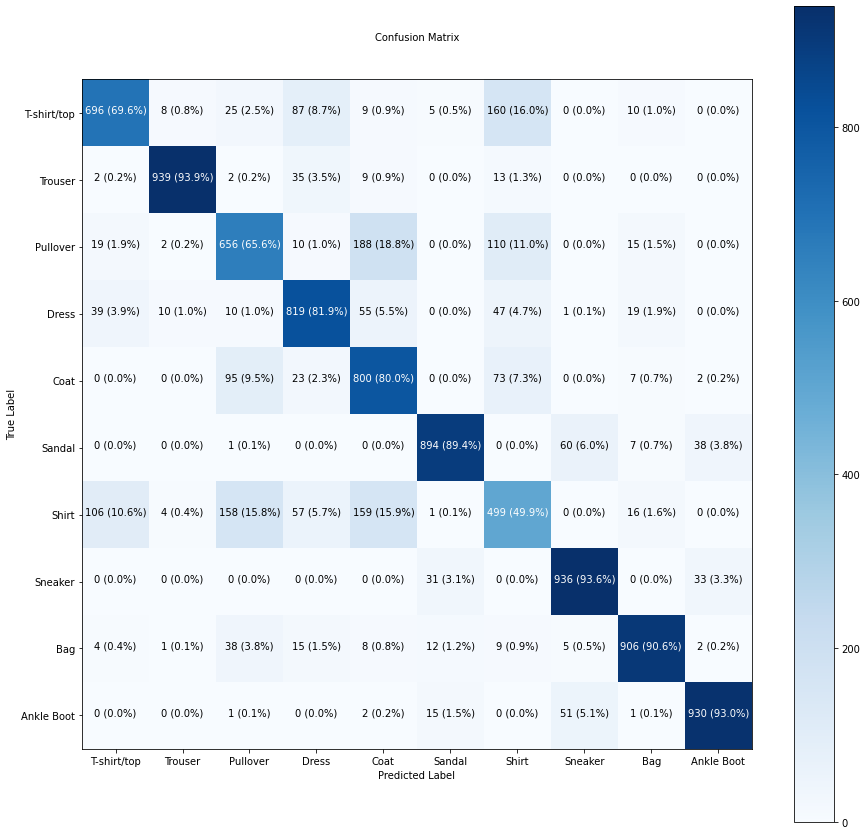

In [88]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15, 15), text_size=10)

**Note**: Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and the predicted label

In [89]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a predicted class
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is correct or incorrect
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel info (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)


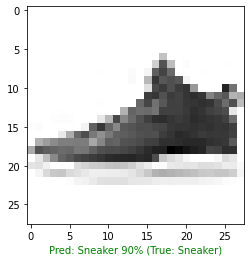

In [90]:
# Check out a random image and prediction
plot_random_image(model=model_14, images=test_data_normalized, true_labels=test_labels, classes=class_names)

# What patterns is our model learning?

In [91]:
model_14.layers

In [92]:
model_14.layers[1]

In [93]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[ 0.7150263 , -0.06077094, -0.99763054, -1.048431  ],
        [ 0.27732128, -0.47155392, -0.5291646 ,  0.02329262],
        [ 0.775243  ,  0.540276  , -1.1288569 , -0.7426157 ],
        ...,
        [-0.39453438,  0.47628698, -0.22641574,  0.25505954],
        [-0.4051576 ,  0.6181001 ,  0.23928389, -0.5038765 ],
        [ 0.23884599,  0.11606929, -0.12131333,  0.04352435]],
       dtype=float32), (784, 4))

In [94]:
biases, biases.shape

(array([ 2.4485605e-02, -6.1463297e-04, -2.7230164e-01,  8.1124890e-01],
       dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

In [95]:
model_14.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_35 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


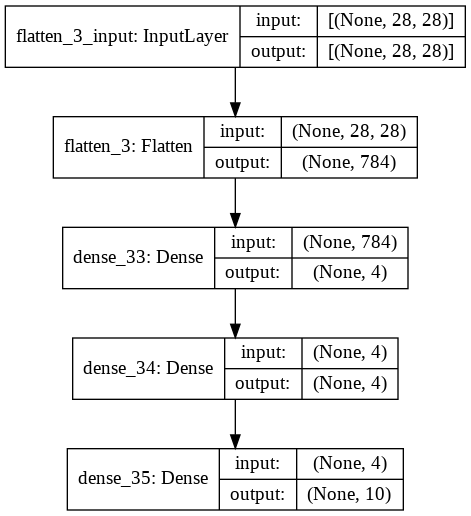

In [96]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

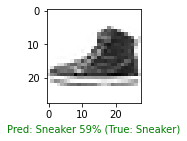

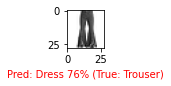

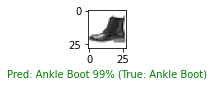

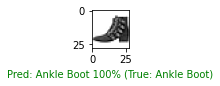

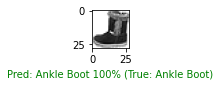

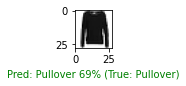

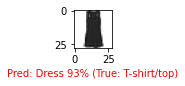

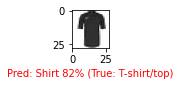

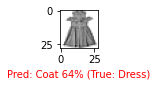

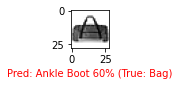

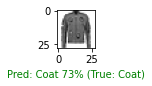

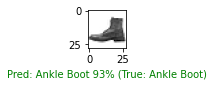

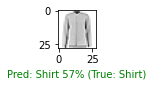

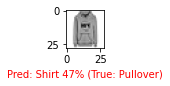

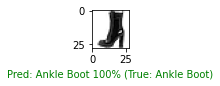

In [101]:
# Plot several images at once
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_random_image(model_14, test_data_normalized, test_labels, class_names)
  plt.show()

In [102]:
model_14.evaluate(test_data_normalized, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5660 - accuracy: 0.8075


[0.5659515857696533, 0.8075000047683716]

In [103]:
# Increasing the amount of epochs during model training to see if accuracy score improves
tf.random.set_seed(42)

model_15 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

history_15 = model_15.fit(train_data_normalized, train_labels, epochs=50, validation_data=(test_data_normalized, test_labels))

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

In [104]:
y_preds = model_14.predict(test_data_normalized)
y_preds

array([[8.5630336e-11, 3.5361509e-13, 2.6633865e-05, ..., 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01],
       [3.4278683e-06, 1.2899412e-16, 9.5989138e-01, ..., 1.1383623e-28,
        6.3271803e-04, 4.4789552e-08],
       [6.1063176e-05, 9.9657673e-01, 4.3867061e-08, ..., 7.3237471e-18,
        5.4811817e-08, 4.9225428e-14],
       ...,
       [7.8579508e-02, 2.2294860e-05, 1.4033388e-01, ..., 2.9533951e-20,
        1.1197242e-01, 4.7600572e-09],
       [3.3110897e-05, 9.9301308e-01, 2.3392155e-07, ..., 9.3987242e-15,
        8.1592776e-07, 1.2158998e-11],
       [7.9815962e-08, 7.7578000e-10, 1.6470610e-04, ..., 4.3826375e-02,
        1.5162538e-03, 3.9120574e-02]], dtype=float32)

In [106]:
model_14.evaluate(test_data_normalized, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5660 - accuracy: 0.8075


[0.5659515857696533, 0.8075000047683716]